## Exploring and Processing Weather Data
#### Sep 25, 2025


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
game_logs = pd.read_csv("../data/final_game_logs.csv")

In [46]:
game_logs.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'game_id', 'home_name', 'away_name',
       'home_probable_pitcher', 'away_probable_pitcher', 'away_score',
       'home_score', 'home_ERA', 'home_ER', 'home_R', 'home_SO', 'home_BB',
       'home_SO/BB', 'home_WHIP', 'away_ERA', 'away_ER', 'away_R', 'away_SO',
       'away_BB', 'away_SO/BB', 'away_WHIP', 'home_OBP', 'home_SLG', 'home_HR',
       'home_R/G', 'home_BB_batting', 'home_SO_batting', 'home_IBB',
       'away_home_OBP', 'away_home_SLG', 'away_home_HR', 'away_home_R/G',
       'away_home_BB_batting', 'away_home_SO_batting', 'away_home_IBB', 'temp',
       'condition', 'wind'],
      dtype='object')

In [54]:
game_logs[['temp', 'condition', 'wind']].isna().sum()

temp         19
condition    19
wind         19
dtype: int64

In [72]:
game_logs["wind"] = game_logs["wind"].str.extract(r"(\d+)")
game_logs["wind"] = pd.to_numeric(game_logs["wind"])

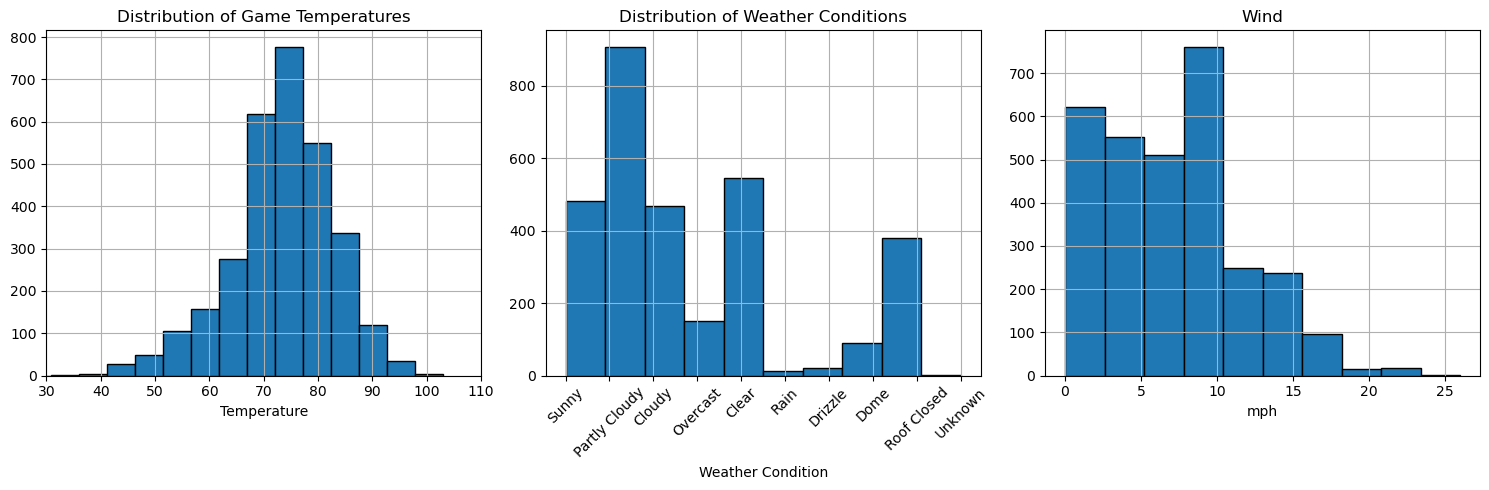

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

game_logs['temp'].hist(ax=axes[0], bins=20, edgecolor='black')
axes[0].set_xlabel("Temperature")
axes[0].set_title("Distribution of Game Temperatures")
axes[0].set_xlim(30, 110)  # example temp range
axes[0].set_xticks(range(30, 111, 10))

game_logs['condition'].hist(ax=axes[1], edgecolor='black')
axes[1].set_xlabel("Weather Condition")
axes[1].set_title("Distribution of Weather Conditions")
axes[1].tick_params(axis='x', rotation=45)  # rotate labels if text overlaps

game_logs['wind'].hist(ax=axes[2], edgecolor='black')
axes[2].set_xlabel("mph")
axes[2].set_title("Wind")

plt.tight_layout()
plt.show()

In [76]:
condition_map = {
    "Clear": 0,
    "Cloudy": 1,
    "Overcast": 2,
    "Rain": 3,
    "Snow": 4,
    "Dome": 5,
    "Drizzle": 6,
    "Unknown": 7,
    "Fog": 8,
    "Other": 9
}

game_logs["condition"] = game_logs["condition"].map(condition_map)

In [78]:
game_logs.head()

,Unnamed: 0.1,Unnamed: 0,game_id,home_name,away_name,home_probable_pitcher,away_probable_pitcher,away_score,home_score,home_ERA,...,away_home_OBP,away_home_SLG,away_home_HR,away_home_R/G,away_home_BB_batting,away_home_SO_batting,away_home_IBB,temp,condition,wind
0,0,0,748266,San Diego Padres,Los Angeles Dodgers,Joe Musgrove,Gavin Stone,14,1,3.88,...,0.335,0.446,233.0,5.20,602.0,1336.0,33.0,71.0,NaN,3.0
1,1,1,748344,Boston Red Sox,Northeastern Huskies,Helcris Olivárez,Aiven Cabral,2,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,16.0
2,2,2,748263,Texas Rangers,Kansas City Royals,Dane Dunning,Daniel Lynch IV,4,5,5.31,...,0.306,0.403,170.0,4.54,429.0,1161.0,22.0,76.0,NaN,9.0
3,3,3,748341,Chicago Cubs,Chicago White Sox,Jordan Wicks,Jesse Chavez,1,8,5.48,...,0.278,0.340,133.0,3.13,395.0,1403.0,8.0,75.0,1.0,6.0
4,4,4,748260,Los Angeles Dodgers,San Diego Padres,Landon Knack,Jhony Brito,1,4,3.65,...,0.324,0.420,190.0,4.69,458.0,1077.0,18.0,76.0,1.0,5.0


In [98]:
import seaborn as sns
corr_matrix = game_logs.select_dtypes(include=(["number"])).corr()
corr_matrix['temp'].sort_values()

condition              -0.184261
home_BB_batting        -0.081970
wind                   -0.081503
home_SO_batting        -0.067268
home_IBB               -0.057259
game_id                -0.045049
away_home_SO_batting   -0.016146
home_BB                -0.015149
home_SO                -0.014854
away_WHIP              -0.010586
home_SO/BB             -0.007456
home_HR                -0.006211
away_ERA               -0.006130
away_home_IBB          -0.004109
away_home_BB_batting   -0.001697
away_SO/BB              0.001413
home_ER                 0.001487
home_OBP                0.002168
home_R                  0.004219
home_ERA                0.005815
away_home_HR            0.006170
away_home_R/G           0.006585
away_BB                 0.010429
away_R                  0.013973
away_home_SLG           0.015026
away_ER                 0.016397
home_WHIP               0.017008
away_home_OBP           0.017998
away_SO                 0.018940
home_R/G                0.033678
home_SLG  

In [102]:
game_logs = game_logs.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [104]:
game_logs.head()

,game_id,home_name,away_name,home_probable_pitcher,away_probable_pitcher,away_score,home_score,home_ERA,home_ER,home_R,...,away_home_OBP,away_home_SLG,away_home_HR,away_home_R/G,away_home_BB_batting,away_home_SO_batting,away_home_IBB,temp,condition,wind
0,748266,San Diego Padres,Los Angeles Dodgers,Joe Musgrove,Gavin Stone,14,1,3.88,43.0,44.0,...,0.335,0.446,233.0,5.20,602.0,1336.0,33.0,71.0,NaN,3.0
1,748344,Boston Red Sox,Northeastern Huskies,Helcris Olivárez,Aiven Cabral,2,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,16.0
2,748263,Texas Rangers,Kansas City Royals,Dane Dunning,Daniel Lynch IV,4,5,5.31,56.0,60.0,...,0.306,0.403,170.0,4.54,429.0,1161.0,22.0,76.0,NaN,9.0
3,748341,Chicago Cubs,Chicago White Sox,Jordan Wicks,Jesse Chavez,1,8,5.48,28.0,31.0,...,0.278,0.340,133.0,3.13,395.0,1403.0,8.0,75.0,1.0,6.0
4,748260,Los Angeles Dodgers,San Diego Padres,Landon Knack,Jhony Brito,1,4,3.65,28.0,28.0,...,0.324,0.420,190.0,4.69,458.0,1077.0,18.0,76.0,1.0,5.0
